# Data Preparation

1) focus is always to understand the final data structure

2) support each step by visual analytics

# Johns Hopkins GITHUB csv data

In [1]:
import pandas as pd
import numpy as np

from datetime import datetime

%matplotlib inline
pd.set_option('display.max_rows', 500)

In [2]:
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv(data_path)

In [3]:
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,36542,36675,36710,36710,36747,36782,36829,36896,37015,37054
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,5197,5276,5396,5519,5620,5750,5889,6016,6151,6275
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,29831,30394,30950,31465,31972,32504,33055,33626,34155,34693
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,922,925,925,925,937,939,939,944,955,955
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1109,1148,1164,1199,1280,1344,1395,1483,1538,1572


In [4]:
time_idx=pd_raw.columns[4:]

In [5]:
df_plot = pd.DataFrame({
    'date':time_idx})
df_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [6]:
pd_raw['Country/Region']

0                           Afghanistan
1                               Albania
2                               Algeria
3                               Andorra
4                                Angola
5                   Antigua and Barbuda
6                             Argentina
7                               Armenia
8                             Australia
9                             Australia
10                            Australia
11                            Australia
12                            Australia
13                            Australia
14                            Australia
15                            Australia
16                              Austria
17                           Azerbaijan
18                              Bahamas
19                              Bahrain
20                           Bangladesh
21                             Barbados
22                              Belarus
23                              Belgium
24                                Benin


In [7]:
pd_raw[pd_raw['Country/Region']=='Germany'].iloc[:,4::].sum(axis=0)[0:4]

1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
dtype: int64

In [8]:
country_list=['Italy',
              'US',
              'Spain',
              'Germany',
              'Korea, South',
             ]

In [9]:
for each in country_list:
    df_plot[each]=np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))

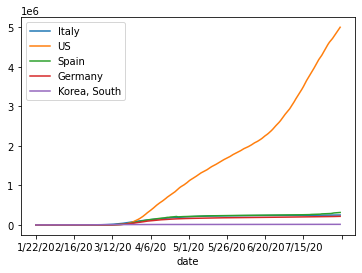

In [10]:
%matplotlib inline
df_plot.set_index('date').plot()

# Data Type Date

In [11]:
df_plot.head()

,date,Italy,US,Spain,Germany,"Korea, South"
0,1/22/20,0,1,0,0,1
1,1/23/20,0,1,0,0,1
2,1/24/20,0,2,0,0,2
3,1/25/20,0,2,0,0,2
4,1/26/20,0,5,0,0,3


In [12]:
time_idx=[datetime.strptime( each,"%m/%d/%y") for each in df_plot.date] # convert to datetime
time_str=[each.strftime('%Y-%m-%d') for each in time_idx] # convert back to date ISO norm (str)

In [13]:
df_plot['date']=time_idx
type(df_plot['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [14]:
df_plot.head()

,date,Italy,US,Spain,Germany,"Korea, South"
0,2020-01-22,0,1,0,0,1
1,2020-01-23,0,1,0,0,1
2,2020-01-24,0,2,0,0,2
3,2020-01-25,0,2,0,0,2
4,2020-01-26,0,5,0,0,3


In [15]:
df_plot.to_csv('../data/processed/COVID_small_flat_table.csv',sep=';',index=False)

# Relational data model - defining a primary key

A primary key’s main features are:

1) It must contain a unique value for each row of data

2) It cannot contain null values

In [16]:
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv(data_path)
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,36542,36675,36710,36710,36747,36782,36829,36896,37015,37054
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,5197,5276,5396,5519,5620,5750,5889,6016,6151,6275
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,29831,30394,30950,31465,31972,32504,33055,33626,34155,34693
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,922,925,925,925,937,939,939,944,955,955
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1109,1148,1164,1199,1280,1344,1395,1483,1538,1572


In [17]:
pd_data_base=pd_raw.rename(columns={'Country/Region':'country',
                      'Province/State':'state'})

In [18]:
pd_data_base=pd_data_base.drop(['Lat','Long'],axis=1)
pd_data_base.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,36542,36675,36710,36710,36747,36782,36829,36896,37015,37054
1,NaN,Albania,0,0,0,0,0,0,0,0,...,5197,5276,5396,5519,5620,5750,5889,6016,6151,6275
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,29831,30394,30950,31465,31972,32504,33055,33626,34155,34693
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,922,925,925,925,937,939,939,944,955,955
4,NaN,Angola,0,0,0,0,0,0,0,0,...,1109,1148,1164,1199,1280,1344,1395,1483,1538,1572


In [19]:
test_pd=pd_data_base.set_index(['state', 'country']).T

In [20]:
test_pd.columns

MultiIndex([(                           nan,           'Afghanistan'),
            (                           nan,               'Albania'),
            (                           nan,               'Algeria'),
            (                           nan,               'Andorra'),
            (                           nan,                'Angola'),
            (                           nan,   'Antigua and Barbuda'),
            (                           nan,             'Argentina'),
            (                           nan,               'Armenia'),
            ('Australian Capital Territory',             'Australia'),
            (             'New South Wales',             'Australia'),
            ...
            (                           nan,                'Malawi'),
            ( 'Falkland Islands (Malvinas)',        'United Kingdom'),
            (   'Saint Pierre and Miquelon',                'France'),
            (                           nan,           'South

In [21]:
test_pd.stack(level=[0,1]).reset_index()

,level_0,state,country,0
0,1/22/20,NaN,Afghanistan,0.0
1,1/22/20,NaN,Albania,0.0
2,1/22/20,NaN,Algeria,0.0
3,1/22/20,NaN,Andorra,0.0
4,1/22/20,NaN,Angola,0.0
...,...,...,...,...
90395,8/8/20,Zhejiang,West Bank and Gaza,13928.0
90396,8/8/20,Zhejiang,Western Sahara,10.0
90397,8/8/20,Zhejiang,Yemen,1797.0
90398,8/8/20,Zhejiang,Zambia,7903.0


In [22]:
pd_relational_model=pd_data_base.set_index(['state','country']) \
                                .T                              \
                                .stack(level=[0,1])             \
                                .reset_index()                  \
                                .rename(columns={'level_0':'date',
                                                   0:'confirmed'},
                                                  )
pd_relational_model.head()

,date,state,country,confirmed
0,1/22/20,NaN,Afghanistan,0.0
1,1/22/20,NaN,Albania,0.0
2,1/22/20,NaN,Algeria,0.0
3,1/22/20,NaN,Andorra,0.0
4,1/22/20,NaN,Angola,0.0


In [23]:
pd_relational_model.dtypes

date          object
state         object
country       object
confirmed    float64
dtype: object

In [24]:
pd_relational_model['date']=pd_relational_model.date.astype('datetime64[ns]')

In [25]:
pd_relational_model.dtypes

date         datetime64[ns]
state                object
country              object
confirmed           float64
dtype: object

In [26]:
df_plot.to_csv('../data/processed/COVID_relational_confirmed.csv',sep=';')